In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [17]:
fname = make_fname('Bin1',0,0,0,0,0)
with open(fname,'rb') as f:
    agent = pickle.load(f)

In [9]:
def make_detpol():
    detpol = np.zeros((13,13))
    for i_ind,i in enumerate(np.linspace(-1,1,13)):
        for j_ind,j in enumerate(np.linspace(-1,1,13)):
            detpol[i_ind,j_ind] = -np.sign(i*j)
    detpol = detpol[:-1,:-1]
    return detpol

def pol_diff(agent, detpol):
    # Compares the greedy policy given by Qtab ([12,12,2]) and the deterministic policy.
    # Returns MSE.
    Qpol = np.sign(agent.Qtab[:,1].reshape(12,12) - agent.Qtab[:,0].reshape(12,12))
    return np.mean(np.square(Qpol-detpol))

def make_fname(label,alpha,gamma,eps,runtime,it):
    return './Outputs_11_30/'+label+'_a'+str(alpha)+'g'+str(gamma)+'e'+str(eps)+'r'+str(runtime)+'_iter'+str(it)+'.json'

def get_avs(label,alpha,gamma,eps,runtime):
    # Return average eval 
    if runtime==2:
        eval_vecs = np.zeros((5,11))
        rew_vecs = np.zeros((5,10000))
    elif runtime==0:
        eval_vecs = np.zeros((5,21))
        rew_vecs = np.zeros((5,20000))
    else:
        raise ValueError('Invalid runtime')
    
    detpol = make_detpol()    
    Qmse = np.zeros(5)
    for it in range(5):
        with open(make_fname(label,alpha,gamma,eps,runtime,it),'rb') as f: 
            agent = pickle.load(f)
        eval_vecs[it,:] = agent.eval_rewards
        #rew_vecs[it,:] = agent.rewards
        Qmse[it] = pol_diff(agent, detpol)
    return np.mean(eval_vecs,axis=0),np.mean(Qmse) #,np.mean(rew_vecs,axis=0)

### First run
alphas = [.1, .05, .01, .005, .001]

gammas = [.7, .8, .9, .95, .98]

epsilons = [.1, .05, .01]

runtimes = [10000, 20000]

In [7]:
Qperfs = np.zeros((5,5,3,2))
for a in range(5):
    for g in range(5):
        for ep in range(3):
            for r in range(2):
                tmp, Qperfs[a,g,ep,r] = get_avs('Plain',a,g,ep,r)

ValueError: could not broadcast input array from shape (21) into shape (11)

### Second run:
alphas = [.5, .25, .1]

gammas = [0, .25, .5, .75]

epsilons = [.1, .05, .01]

runtimes = [20000]

In [19]:
Qperfs = np.zeros((3,4,3,1))
for a in range(3):
    for g in range(4):
        for ep in range(3):
            for r in range(1):
                tmp, Qperfs[a,g,ep,r] = get_avs('Bin3',a,g,ep,r)

### Bin 1

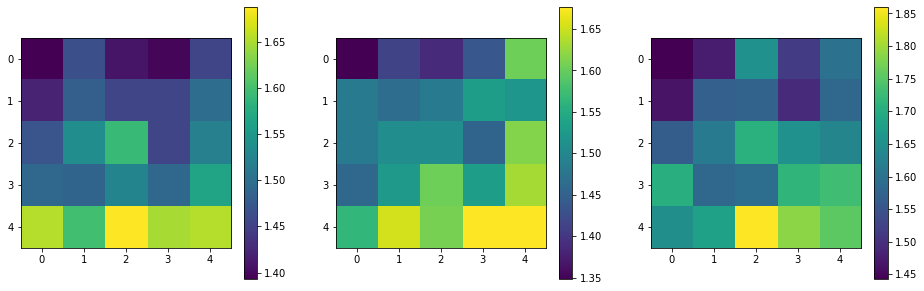

In [63]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches((16,5))
for i in range(3):
    im = ax[i].imshow(Qperfs[:,:,i,1])
    fig.colorbar(im,ax=ax[i])

Best: (0,0,1,1)

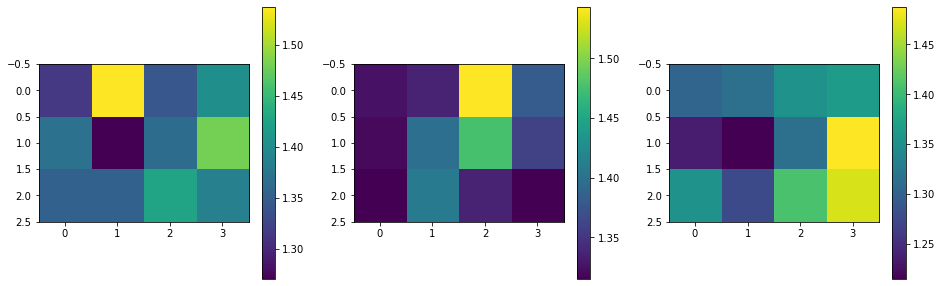

In [16]:
# Second grid search
fig,ax = plt.subplots(1,3)
fig.set_size_inches((16,5))
for i in range(3):
    im = ax[i].imshow(Qperfs[:,:,i,0])
    fig.colorbar(im,ax=ax[i])

In [18]:
Qperfs[1,1,2,0]

1.2152777777777777

Best: 1,1,2,0

### Bin 3 (basically no binning but collapsed body angle)

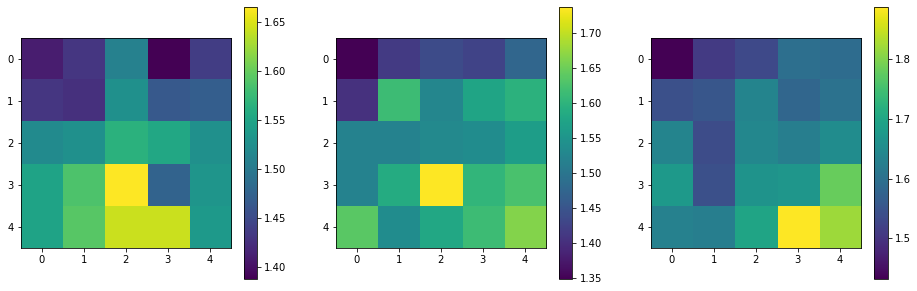

In [65]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches((16,5))
for i in range(3):
    im = ax[i].imshow(Qperfs[:,:,i,1])
    fig.colorbar(im,ax=ax[i])

Best: (0,0,1,1)

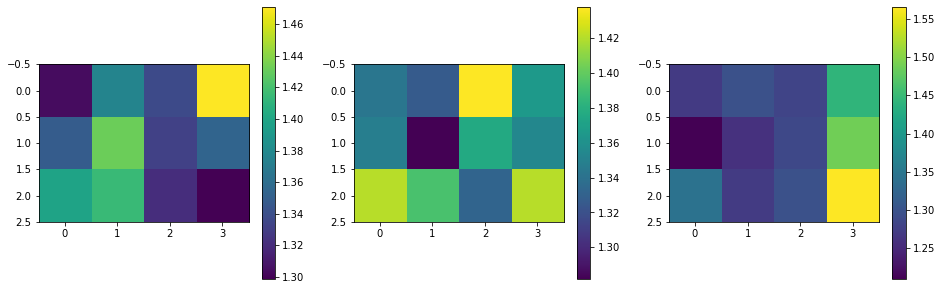

In [21]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches((16,5))
for i in range(3):
    im = ax[i].imshow(Qperfs[:,:,i,0])
    fig.colorbar(im,ax=ax[i])

In [23]:
Qperfs[1,0,2,0]

1.2097222222222224

Best: (1,0,2,0)

### No collapse, kept everything (naive)

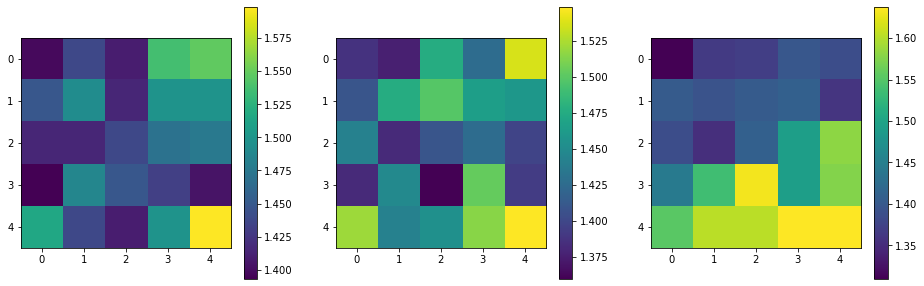

In [98]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches((16,5))
for i in range(3):
    im = ax[i].imshow(Qperfs[:,:,i,0])
    fig.colorbar(im,ax=ax[i])

Best: (0,0,2,0)

#### Second set of params

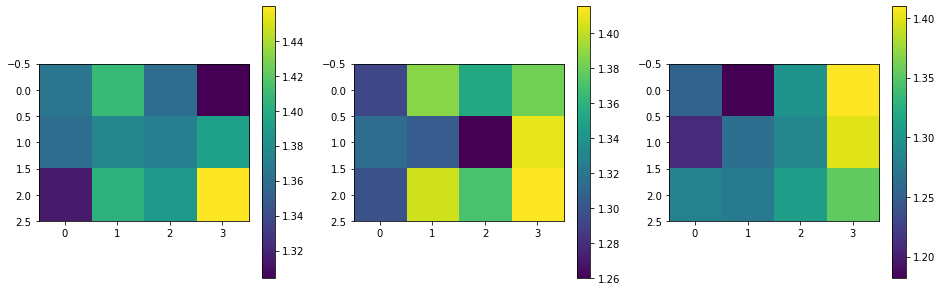

In [11]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches((16,5))
for i in range(3):
    im = ax[i].imshow(Qperfs[:,:,i,0])
    fig.colorbar(im,ax=ax[i])

Best: 0,1,2,0

In [22]:
np.unravel_index(np.argmin(Qperfs),Qperfs.shape)

(1, 0, 2, 0)

In [60]:
Qperfs[0,0,1,1]

1.3486111111111112

In [81]:
Evplain, Qplain = get_avs('Plain',0,0,2,1)
Evbin1, Qbin1 = get_avs('Bin1',0,0,1,1)
Evbin3, Qbin3 = get_avs('Bin3',0,0,1,1)

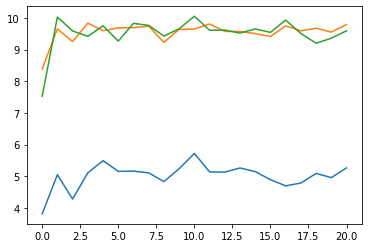

In [82]:
plt.plot(Evplain)
plt.plot(Evbin1)
plt.plot(Evbin3)

In [83]:
print(Qplain,Qbin1,Qbin3)

1.3430555555555554 1.3486111111111112 1.348611111111111


## Second grid search

In [24]:
Evplain, Qplain = get_avs('Plain',0,1,2,0)
Evbin1, Qbin1 = get_avs('Bin1',1,1,2,0)
Evbin3, Qbin3 = get_avs('Bin3',1,0,2,0)

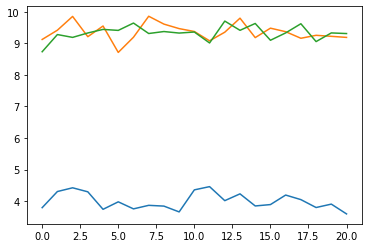

In [25]:
plt.plot(Evplain)
plt.plot(Evbin1)
plt.plot(Evbin3)

In [26]:
print(Qplain,Qbin1,Qbin3)

1.1819444444444442 1.2152777777777777 1.2097222222222224


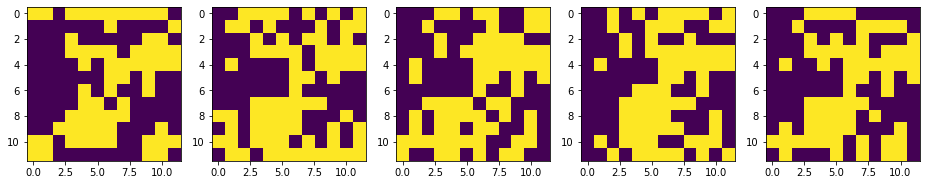

In [93]:
fig,ax = plt.subplots(1,5)
fig.set_size_inches((16,3))
for i in range(5):
    fname = make_fname('Bin1',0,0,1,1,i)
    with open(fname,'rb') as f:
        agent = pickle.load(f)
    Qpol = np.sign(agent.Qtab[:,1].reshape(12,12) - agent.Qtab[:,0].reshape(12,12))
    ax[i].imshow(Qpol)

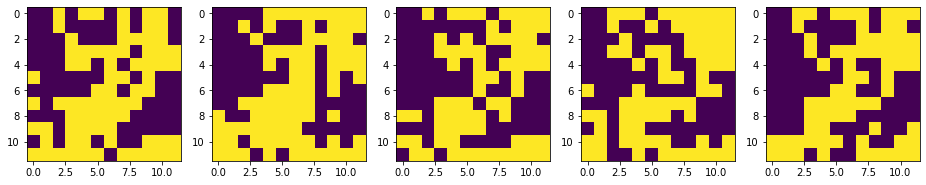

In [28]:
# Second grid search
fig,ax = plt.subplots(1,5)
fig.set_size_inches((16,3))
for i in range(5):
    fname = make_fname('Bin1',1,1,2,0,i)
    with open(fname,'rb') as f:
        agent = pickle.load(f)
    Qpol = np.sign(agent.Qtab[:,1].reshape(12,12) - agent.Qtab[:,0].reshape(12,12))
    ax[i].imshow(Qpol)

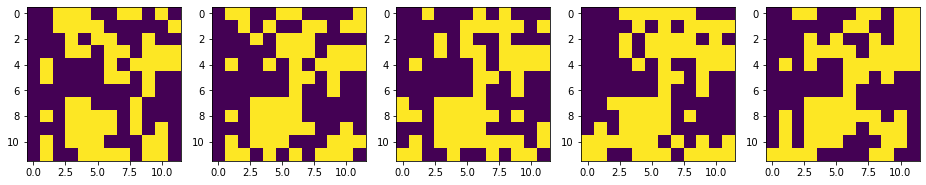

In [94]:
fig,ax = plt.subplots(1,5)
fig.set_size_inches((16,3))
for i in range(5):
    fname = make_fname('Bin3',0,0,1,1,i)
    with open(fname,'rb') as f:
        agent = pickle.load(f)
    Qpol = np.sign(agent.Qtab[:,1].reshape(12,12) - agent.Qtab[:,0].reshape(12,12))
    ax[i].imshow(Qpol)

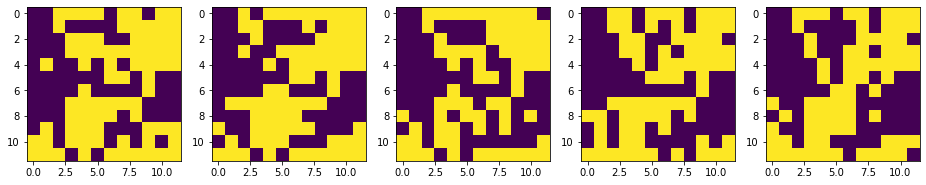

In [29]:
# Second grid search
fig,ax = plt.subplots(1,5)
fig.set_size_inches((16,3))
for i in range(5):
    fname = make_fname('Bin3',1,0,2,0,i)
    with open(fname,'rb') as f:
        agent = pickle.load(f)
    Qpol = np.sign(agent.Qtab[:,1].reshape(12,12) - agent.Qtab[:,0].reshape(12,12))
    ax[i].imshow(Qpol)

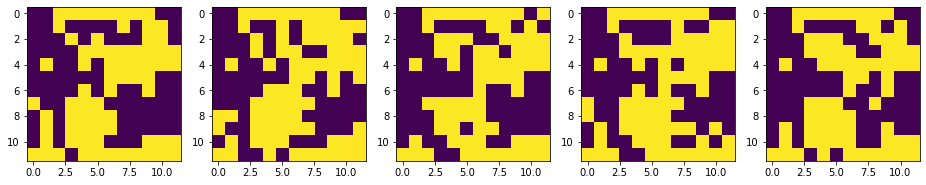

In [96]:
fig,ax = plt.subplots(1,5)
fig.set_size_inches((16,3))
for i in range(5):
    fname = make_fname('Plain',0,0,2,0,i)
    with open(fname,'rb') as f:
        agent = pickle.load(f)
    Qpol = np.sign(agent.Qtab[:,1].reshape(12,12) - agent.Qtab[:,0].reshape(12,12))
    ax[i].imshow(Qpol)

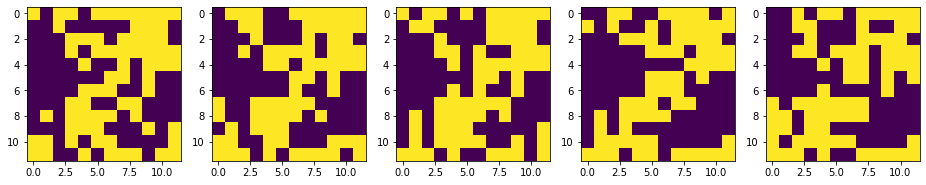

In [13]:
# Second grid search
fig,ax = plt.subplots(1,5)
fig.set_size_inches((16,3))
for i in range(5):
    fname = make_fname('Plain',0,1,2,0,i)
    with open(fname,'rb') as f:
        agent = pickle.load(f)
    Qpol = np.sign(agent.Qtab[:,1].reshape(12,12) - agent.Qtab[:,0].reshape(12,12))
    ax[i].imshow(Qpol)